In [78]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [79]:
class QuadEqState(TypedDict):

    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [80]:
def show_equation(state: QuadEqState):

    equation = ""
    equation += f'{state["a"]}x2'
    if state['b'] > 0:
        equation += f' + {state["b"]}x'
    else:
        equation += f' - {abs(state["b"])}x'    
    if state['c'] > 0:
        equation += f' + {state["c"]}'
    else:
        equation += f' - {abs(state["c"])}'

    return {'equation': equation}

In [81]:
def calc_discriminant(state: QuadEqState):

    discriminant = state['b']**2 - 4*state['a']*state['c']

    return {'discriminant': discriminant}

In [82]:
def real_roots(state: QuadEqState):

    root1 = (-state['b'] + state['discriminant']**(0.5))/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**(0.5))/(2*state['a'])

    result = f'Roots of the quad eqations are {round(root1,2)} and {round(root2,2)}.'

    return {'result': result}



In [83]:
def repeated_roots(state: QuadEqState):

    root = (-state['b'])/(2*state['a'])

    result = f'The repeated roots of the quad eqations is {round(root,2)}.'

    return {'result': result}

In [84]:
def no_real_roots(state: QuadEqState):

    result = 'There are not real roots.'

    return {'result': result}

In [85]:
def check_condition(state: QuadEqState) -> Literal["real_roots", "repeated_roots","no_real_roots"]:
    
    if state['discriminant'] > 0:
        return 'real_roots' 
    elif state['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

In [86]:
graph = StateGraph(QuadEqState)

#nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calc_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

#edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)

graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

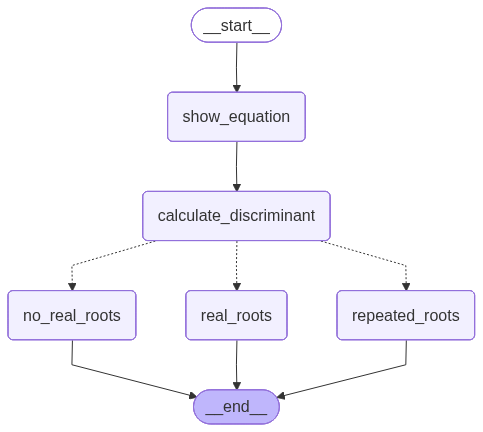

In [87]:
graph.compile()

In [89]:
initial_state = {'a': 4, 'b': 10, 'c': 2}

workflow.invoke(initial_state)

{'a': 4,
 'b': 10,
 'c': 2,
 'equation': '4x2 + 10x + 2',
 'discriminant': 68,
 'result': 'Roots of the quad eqations are -0.22 and -2.28.'}